In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Collatz Sequence Distances

The Collatz Conjecture says that, for any natural number $n$, the iterated computation of:

$3n + 1$, $n$ odd <br/>
$\frac{n}{2}$, $n$ even

will terminate in 1.

The conjecture is immediately confirmable for powers of 2. And in fact *any* such sequence that terminates in 1 must go through a power of 2. It is only through 2 that we can get to 1, only through 4 that we can get to 2. If we think about the possible terminations of such sequences, we can construct the following base of the tree:

3 $\quad$ 20 21$\quad$ 128 <br/>
\\ $\quad$ / $\quad$ \\ $\quad$ / <br/>
10 $\qquad$64 <br/>
| $\qquad$ | <br/>
5 $\quad$ 32 <br/>
\\ $\quad$ / <br/>
$\quad$16 <br/>
$\quad$| <br/>
$\quad$8 <br/>
$\quad$| <br/>
$\quad$4 <br/>
$\quad$| <br/>
$\quad$2 <br/>
$\quad$| <br/>
$\quad$1

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np

In [ ]:
def collatz_seq_len(n):
    while n % 2 == 0:
        n //= 2
    if n == 1:
        out = 0
    else:
        out = 0
        while n != 1:
            n = 3*n + 1
            while n % 2 == 0:
                n //= 2
            # print(n)
            out += 1
    return out

In [ ]:
collatz_seq_len(1)

In [ ]:
fig, ax = plt.subplots()

X = np.arange(1, 100, 2)
Y = [collatz_seq_len(x) for x in X]
ax.scatter(X, Y);

In [ ]:
collatz_seq_len(27)

In [ ]:
fig, ax = plt.subplots()
ax.hist([collatz_seq_len(x) for x in X]);

In [ ]:
fig, ax = plt.subplots()

X = np.arange(1, 100000, 2)
Y = [collatz_seq_len(x) for x in X]
ax.scatter(X, Y, s=1);

## Jupyter format

In [ ]:
import pandas

In [ ]:
series = pandas.Series([1e30, 2e20])

In [ ]:
series

In [ ]:
pandas.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
series

## `df.assign()` and `df.pipe()`

In [ ]:
new_df = pandas.DataFrame([[0, 2], [1, 3]], columns=['first', 'second'])

In [ ]:
new_df.assign(new=[4, 5])

In [ ]:
def add_row(df):
    return pandas.concat([df, pandas.DataFrame([df.shape[1] * [0]],
                                               columns=df.columns)])

In [ ]:
new_df.pipe(add_row)

## `pprint`

In [ ]:
import pprint

In [ ]:
pprint.pprint(new_df)

In [ ]:
pprint.pformat(new_df)

## `folium`

In [ ]:
# !pip install folium
import folium
import folium.plugins

In [ ]:
cmh = folium.Map(location=(40, -83))
cmh

In [ ]:
fake_data = [(40.1, -83.1), (39.9, -82.9)]
cmh.add_child(folium.plugins.HeatMap(fake_data, radius=10))

In [ ]:
import json

In [ ]:
with open('State-zip-code-GeoJSON/oh_ohio_zip_codes_geo.min.json', 'r') as f:
    data = json.load(f)

folium.GeoJson(data).add_to(cmh)
cmh

## `matplotlib`

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
line, = plt.plot([1, 2, 3])

In [ ]:
line.set

In [ ]:
plt.setp(line, 'linestyle')

In [ ]:
plt.setp(line)

In [ ]:
%matplotlib notebook
plt.plot([1, 2, 3]);

## `dict()`

In [ ]:
dict(one='two')

## `requests`

In [ ]:
import requests as rq

In [ ]:
response = rq.get('http://www.espn.com')

In [ ]:
response.request.headers

In [ ]:
response.request.method

In [ ]:
response.headers

In [ ]:
response.text

In [ ]:
rq.post('https://www.espn.com/post', data={'name': 'greg'}).status_code

## r-strings

In [ ]:
raw = r'usr\bin\bash'
print(raw)
raw

## String Formatting

In [ ]:
my_num = 42.4242424242
f"{my_num:.11f}"

In [ ]:
arr = np.array([[[1, 2], [3, 4]], [[4, 5], [7, 6]]])

[[item[0] for item in row] for row in arr]

## `@` Notation for Dot-Product of `numpy` Arrays

In [ ]:
X = np.array([1, 2, 3])
Y = np.array([3, 4, 5])

X@Y == X.dot(Y)

## `geopandas`

In [ ]:
#!pip install geopandas

In [ ]:
import geopandas

In [ ]:
geopandas.

## Bias-Variance Decomposition

**E**$[(\gamma - M(z))^2] = (M(z)-$**E**$[M(z)])^2 + Var(M(z)) + Var(\epsilon)$

## `DictVectorizer()`

In [ ]:
import seaborn as sns

sns.get_dataset_names()

diamonds = sns.load_dataset('diamonds')

diamonds.columns

diamonds.dtypes

In [ ]:
from sklearn.feature_extraction import DictVectorizer

DictVectorizer(diamonds['cut'].to_dict())

## Permutation Test

In [ ]:
sns.barplot(data=diamonds, x='clarity', y='price');

In [ ]:
vvs1_mean = diamonds[diamonds['clarity'] == 'VVS1']['price'].mean()

si2_mean = diamonds[diamonds['clarity'] == 'SI2']['price'].mean()

In [ ]:
# From the _Principles and Techniques of Data Science_ Sect. 18.1

def shuffle(series):
    '''
    Shuffles a series and resets index to preserve shuffle when adding series
    back to DataFrame.
    '''
    return series.sample(frac=1, replace=False).reset_index(drop=True)

In [ ]:
diffs = np.array([])

iterations = 1000
for _ in range(iterations):
    diamonds['Shuffled'] = shuffle(diamonds['price'])
    diff = diamonds[diamonds['clarity'] == 'SI2']['Shuffled'].mean() -\
    diamonds[diamonds['clarity'] == 'VVS1']['Shuffled'].mean()
    
    diffs = np.append(diffs, diff)

In [ ]:
p = np.count_nonzero(diffs >= si2_mean - vvs1_mean) / iterations
p

## t Distribution Approaches Normal

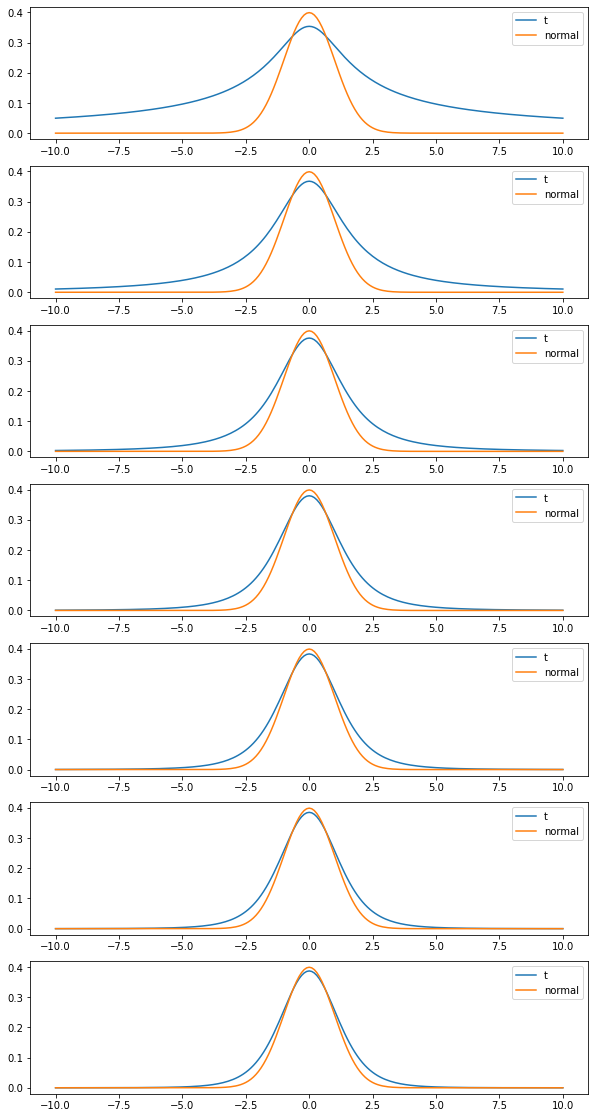

In [4]:
from math import gamma

fig, ax = plt.subplots(7, figsize=(10, 20))

X = np.linspace(-10, 10, 201)
nus = np.arange(2, 9)
y_norm = 1 / np.sqrt(2*np.pi) * np.exp(-0.5 * X**2)

for j in range(7):
    y = gamma((nus[j]+1) / 2) / (np.sqrt(np.pi*nus[j]) * gamma(nus[j] / 2)) *\
(1 + X**2/nus[j])**((-nus[j]+1) / 2)
    ax[j].plot(X, y, label='t')
    ax[j].plot(X, y_norm, label='normal')
    ax[j].legend();

In [135]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr

tpr

thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

<IPython.core.display.Javascript object>


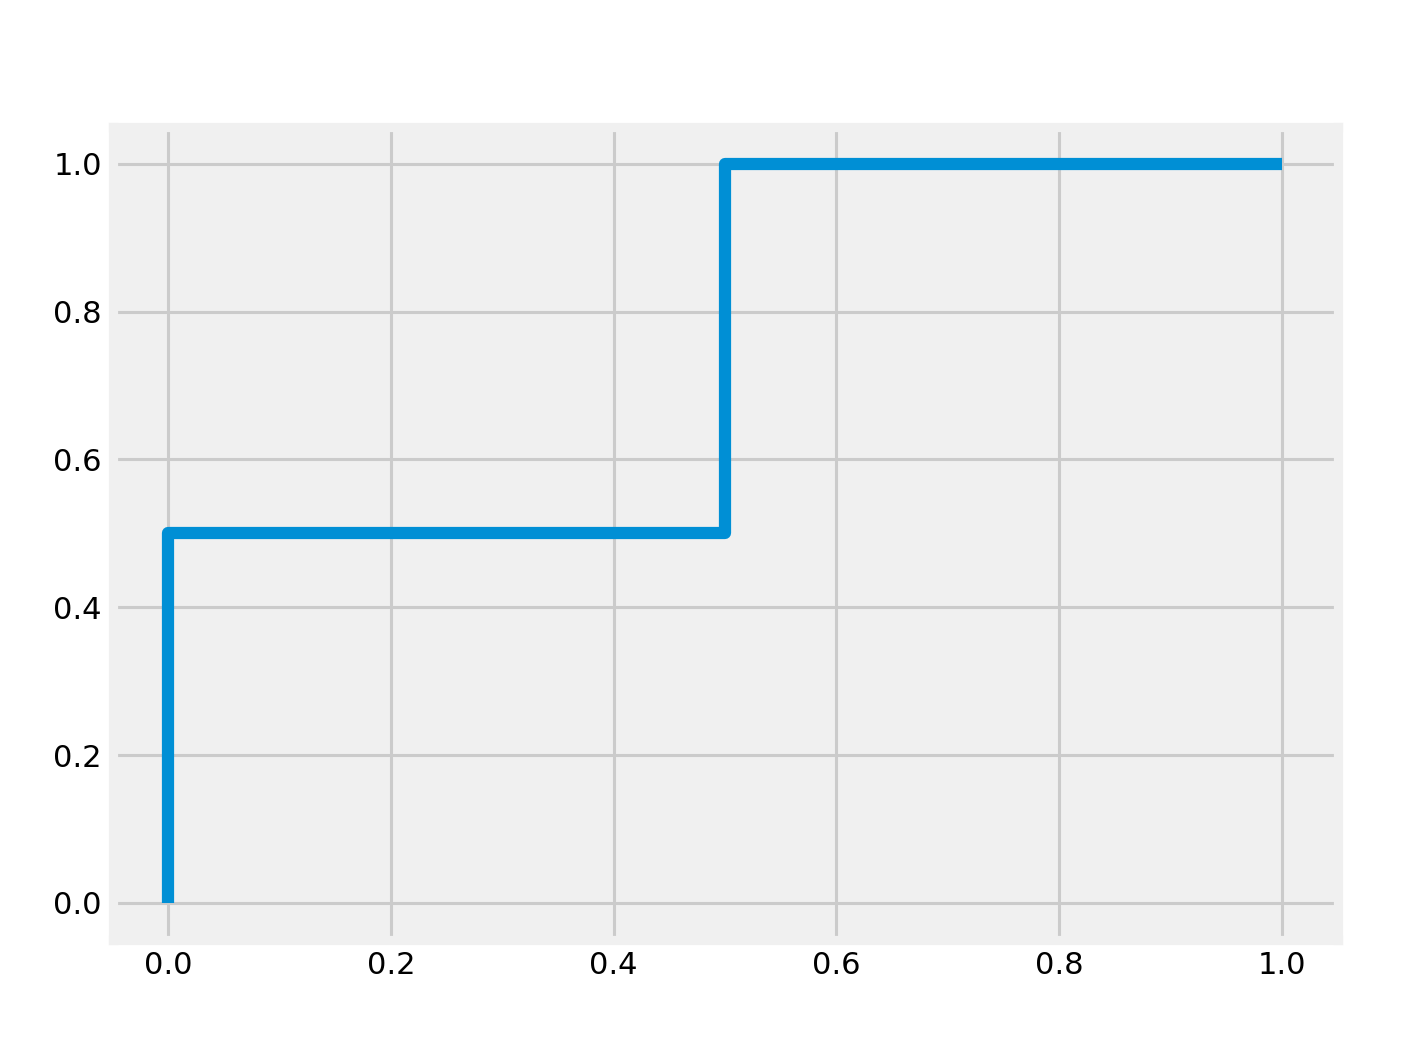

In [136]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr)

## LR Coefs with `StandardScaler`

In [5]:
from scipy import stats

In [6]:
X = stats.norm.rvs(scale=10, size=100).reshape(100, 1)
y = 2*X + stats.norm.rvs(scale=0.1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression().fit(X, y)

In [9]:
lr.coef_

array([[2.]])

In [10]:
ss = StandardScaler().fit(X)

In [11]:
lr2 = LinearRegression().fit(ss.transform(X), y)

In [12]:
lr2.coef_

array([[20.09065776]])

In [15]:
from primes import IsPrime, p_fact

In [16]:
def facts_up_to(n):
    tot = 0
    for j in range(2, n+1):
        tot += sum(p_fact(j))
    return tot

In [17]:
facts_up_to(2187)

6563

In [18]:
n = 2
while facts_up_to(n) < 2*n:
    n += 1
n

32

In [19]:
facts_up_to(32)

65

## Box-Cox

In [ ]:
from scipy import stats

In [ ]:
normal = stats.norm.rvs(loc=100, size=100000)
result1 = boxcox(normal)

In [ ]:
result[1]

In [ ]:
lambdas = np.array([])
for _ in range(100):
    normal = stats.norm.rvs(loc=100, size=100000)
    lambdas = np.append(lambdas, boxcox(normal)[1])

plt.hist(lambdas);

In [ ]:
expon = stats.expon.rvs(size=100000)
result2 = boxcox(expon)

In [ ]:
result2[1]

In [ ]:
lambdas = np.array([])
for _ in range(100):
    expo = stats.expon.rvs(size=100000)
    lambdas = np.append(lambdas, boxcox(normal)[1])

plt.hist(lambdas);

In [ ]:
uni = stats.uniform.rvs(size=100000)
result3 = boxcox(uni)

In [ ]:
result3[1]

In [ ]:
lambdas = np.array([])
for _ in range(100):
    uni = stats.uniform.rvs(size=100000)
    lambdas = np.append(lambdas, boxcox(normal)[1])

plt.hist(lambdas);

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='box-cox').fit(normal.reshape(-1, 1))

In [ ]:
pt.transform(normal.reshape(-1, 1))

In [ ]:
pt.lambdas_

In [ ]:
covid = pd.read_csv('../Downloads/owid-covid-data.csv')

In [ ]:
covid.columns

In [ ]:
covid[covid['location'] == 'United States']

## MGLearn (*Introduction to ML with Python*)

In [ ]:
import mglearn
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                      mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## PCA

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_features=5)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2).fit(X, y).components_

### `numpy.newaxis`

In [ ]:
np.hstack([X, np.ones(len(X))[:, np.newaxis]])

In [ ]:
newX = np.hstack([X, np.array([pca[0].dot(X[j, :]) for j in range(len(X))])[:, np.newaxis],
              np.array([pca[1].dot(X[j, :]) for j in range(len(X))])[:, np.newaxis]])

In [ ]:
plt.scatter(newX[:, -1], newX[:, -2]);

In [ ]:
np.corrcoef(newX)

## Function Nesting

In [ ]:
def add(x, y):
    return x + y

In [ ]:
add(3, 2)

In [ ]:
def mult(x, y):
    out = 0
    for _ in range(y):
        out = add(out, x)
    return out

In [ ]:
mult(3, 2)

In [ ]:
def power(x, y):
    out = 1
    for _ in range(y):
        out = mult(out, x)
    return out

In [ ]:
power(3, 2)

In [ ]:
def bigdot(x, y):
    out = x
    for _ in range(y - 1):
        out = power(out, x)
    return out

In [ ]:
bigdot(3, 2)

In [ ]:
def star(x, y):
    out = x
    for _ in range(y - 1):
        out = bigdot(out, x)
    return out

In [ ]:
star(3, 2)

## Merge Sort

From [geeksforgeeks](https://www.geeksforgeeks.org/merge-sort/)

In [ ]:
def mergeSort(arr): 
    if len(arr) > 1: 
        mid = len(arr) // 2 # Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i += 1
            else: 
                arr[k] = R[j] 
                j += 1
            k += 1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i += 1
            k += 1
          
        while j < len(R): 
            arr[k] = R[j] 
            j += 1
            k += 1
    
    return arr

In [ ]:
mergeSort([1, 3, 2, 25, 14, 375, 6])

## Affinity Propagation

In [ ]:
data = np.array([1, 2, 4, 6])
from sklearn.cluster import AffinityPropagation

In [ ]:
aff = AffinityPropagation().fit(data[:, np.newaxis])

In [ ]:
aff.predict(data[:, np.newaxis])

## Mihir's Clothing Project

In [ ]:
mihir = pd.read_csv('/Users/gdamico/Downloads/Mihir Wardrobe - Sheet1.csv')

In [ ]:
mihir.tail()

In [ ]:
def choose_seven(season):
    import numpy as np
    season = mihir[mihir[season] == 'Yes']
    choices = np.random.choice(season.index, size=7, replace=False)
    outfits = season.loc[choices, :]
    while len(outfits['Top Color'].value_counts()) < 4:
        choices = np.random.choice(season.index, size=7, replace=False)
        outfits = season.loc[choices, :]
    return outfits

In [ ]:
outfits2 = choose_seven('Spring')

In [ ]:
mihir['Top Color'].value_counts()

In [ ]:
mihir.drop(outfits2.index)

## `~`

In [ ]:
~1

In [ ]:
~-1

In [ ]:
import sys
import pyperclip

intellidesk_link = 'https://flatiron.illumidesk.com/hub/lti/launch?next=%2Fhub%2Fuser-redirect%2Fgit-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Flearn-co-curriculum%252Fdsc-lab-name%26urlpath%3Dtree%252Fdsc-lab-name%252Findex.ipynb%26branch%3Dmaster'


#request input from user
sub_string = input('Please provide the Lesson Repo location--->> ').split('/')
    
final_string = intellidesk_link.replace('dsc-lab-name', sub_string[-1])
pyperclip.copy(final_string)

In [ ]:
final_string